# Wrangling Template

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

All the needed libraries are added in the cell above.

## DATA

In [2]:
df = pd.read_csv("dirty.data.csv",encoding = 'unicode_escape')
#df.head() can also be used
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,1.0,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,2.0,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,3.0,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,NaN,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,NaN,abc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10882,12/19/2012 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10883,12/19/2012 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10884,12/19/2012 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data in the csv file is read using python library to read csv files. It's then displayed to just get a rough idea of data and columns it contains.

In [3]:
##displays the numbers of rows and columns a data contains.
df.shape

(10886, 14)

Data have 14 cols and more than 10,000 entries.

## Data Types or Information of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10882 non-null  object 
 1   season      10877 non-null  float64
 2   holiday     10879 non-null  object 
 3   workingday  10878 non-null  float64
 4   weather     10879 non-null  float64
 5   temp        10876 non-null  float64
 6   atemp       10879 non-null  float64
 7   humidity    10873 non-null  float64
 8   windspeed   10874 non-null  object 
 9   casual      10878 non-null  float64
 10  registered  10877 non-null  float64
 11  count       10875 non-null  object 
 12  total       3 non-null      float64
 13  Products    10879 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.2+ MB


The dataframe's information is printed using the info() function. The number of columns, column labels, column data types, memory use, range index, and the number of cells in each column are all included in the data (non-null values).

## Missing Values Analysis

In [5]:
df.isna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,Products
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,True,True,True,True,True,True,True,True,True,True,True,True,True
10882,False,True,True,True,True,True,True,True,True,True,True,True,True,True
10883,False,True,True,True,True,True,True,True,True,True,True,True,True,True
10884,False,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
df.isna().sum()

datetime          4
season            9
holiday           7
workingday        8
weather           7
temp             10
atemp             7
humidity         13
windspeed        12
casual            8
registered        9
count            11
total         10883
Products          7
dtype: int64

> This produces a summary of how many missing values the dataframe has. The isna() function looks for missing values in the dataframe and returns a Boolean result for each element. The sum() function counts how many True values there are.

> In this data the most null values are shown in data which we will be visulized below.

> Other columns having missing values will be dealt as per the requirement.

### Visulization of Missing Value

#### BAR Plot

<AxesSubplot:>

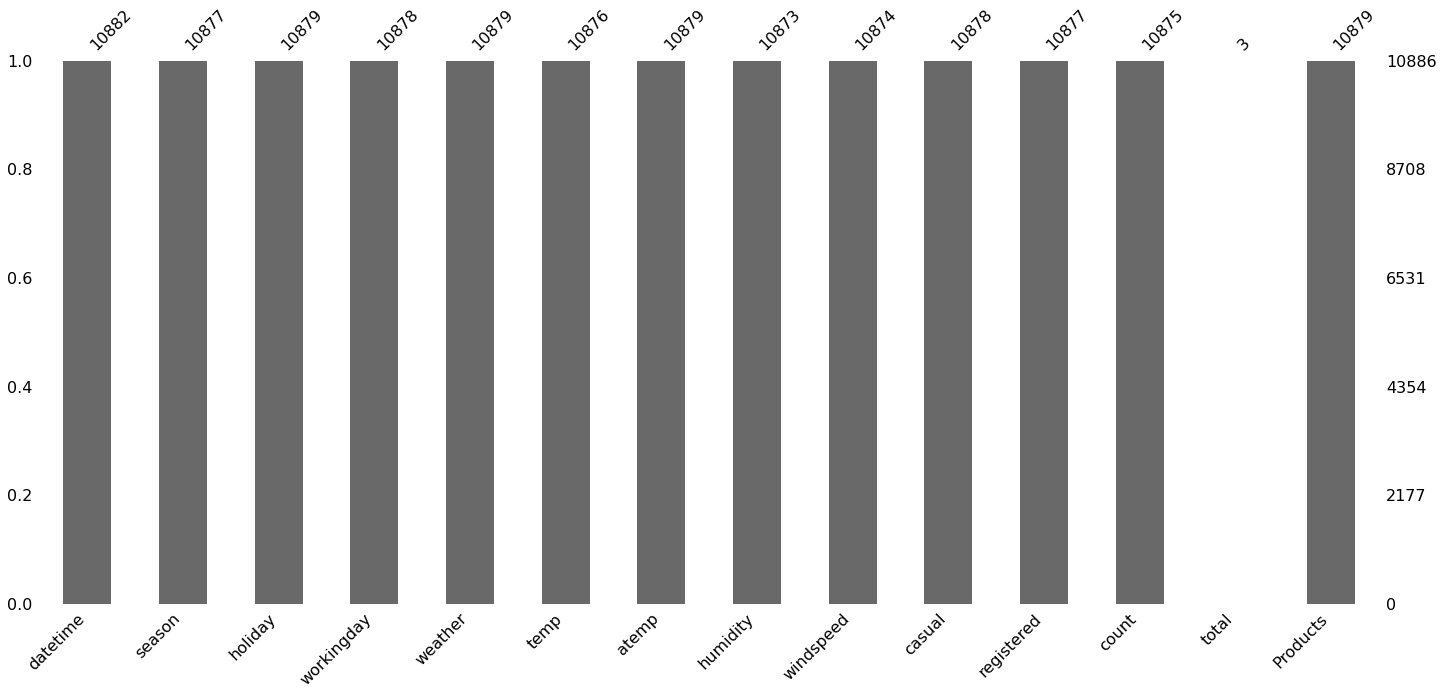

In [7]:
msno.bar(df)

> The barplot is a basic plot in which each bar represents one of the dataframe's columns. The height of the bar represents the column's completeness, or the number of non-null values present.

>The scale is measured in index values on the x-axis of the graphic. The upper right corner represents the dataframe's maximum amount of rows.

>The y-axis scale on the left side of the figure spans from 0.0 to 1.0, with 1.0 representing 100% data completeness. If the bar is smaller than this, it means that that column has missing values.

>There are a series of numbers along the top of the plot that show the overall count of non-null values inside that column.


#### Matrix Plot

<AxesSubplot:>

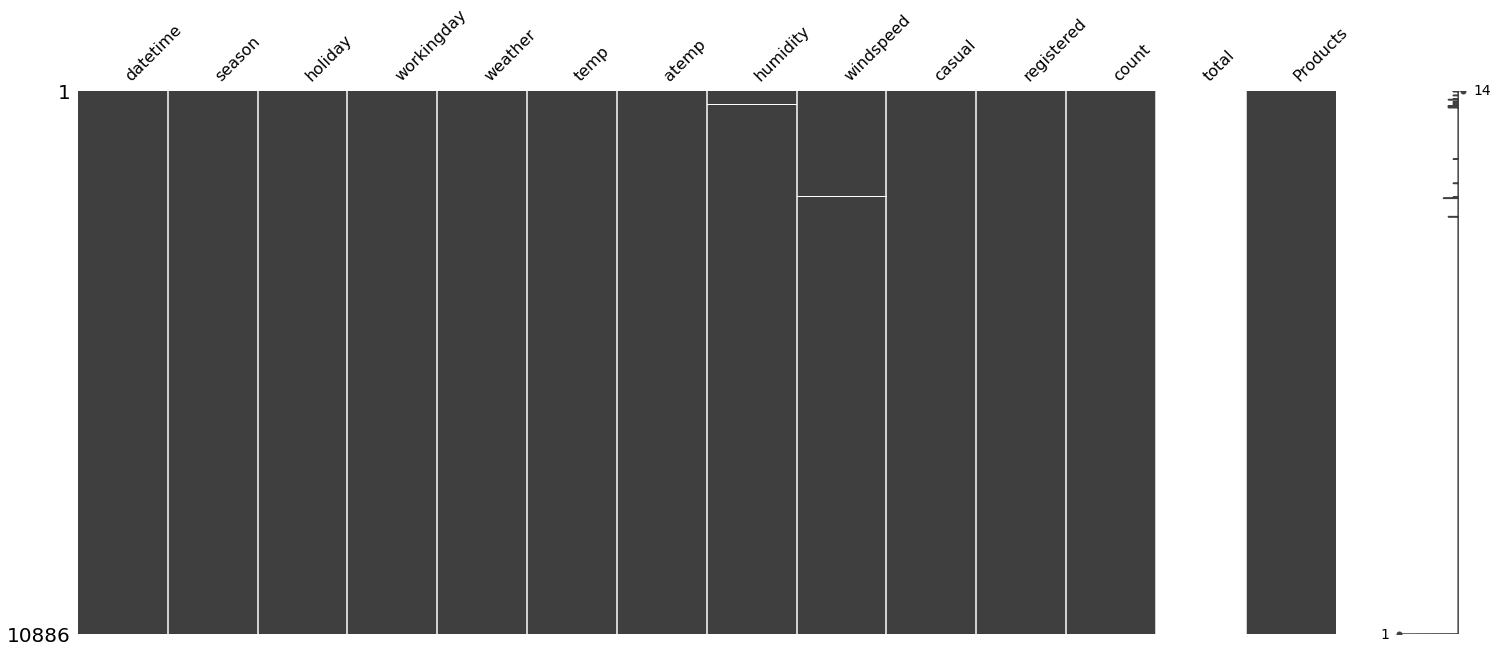

In [8]:
msno.matrix(df)

> It provides a colour fill for each column. When data is provided, the plot is coloured in grey (or your preferred colour), but when data is not present, the plot is white.

> As discussed above total shows alot of white space showing the missing values.

> Missing values in other columns like humidity and windspeed also exist on the plot, the thiness of the like shows the small number of missing values as compared to total col.

#### Dendogram

<AxesSubplot:>

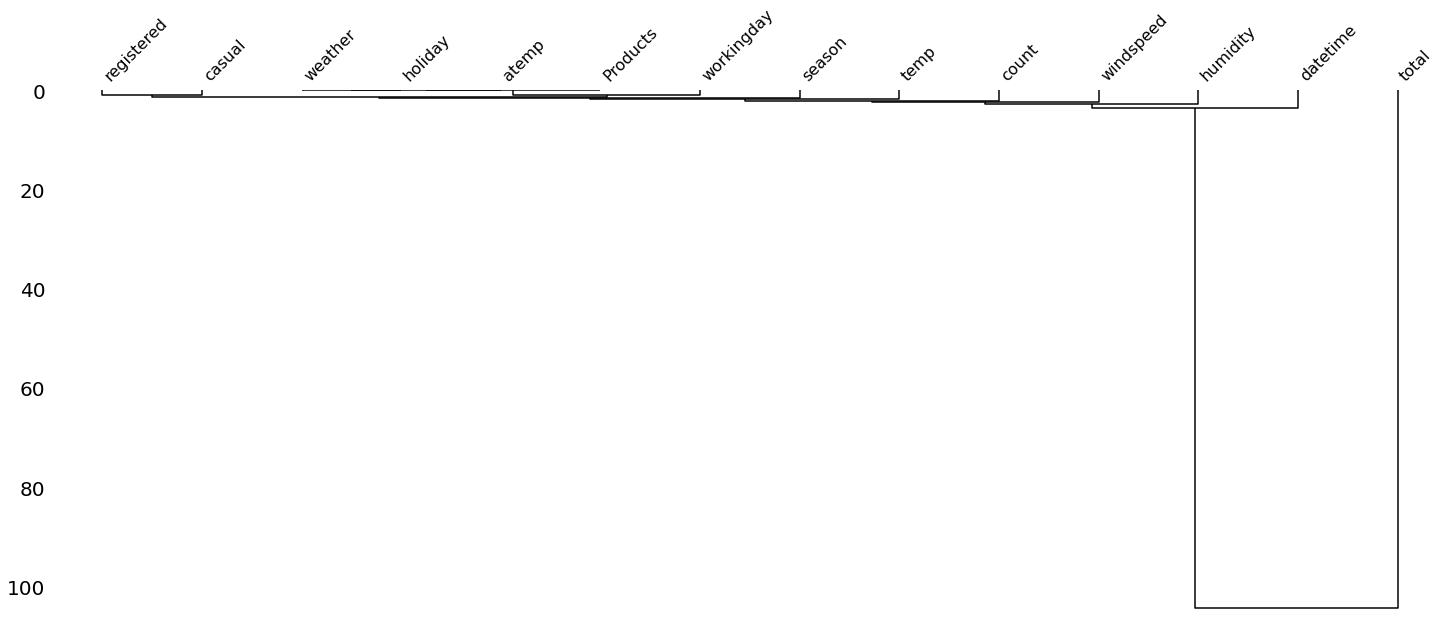

In [9]:
msno.dendrogram(df)

> The dendrogram plot is a tree-like graph formed by hierarchical clustering that groups together columns with high nullity correlations.
When a collection of columns is grouped at level zero, the presence or absence of nulls in one of the columns is directly connected to the presence or absence of nulls in the other columns. The more columns in the tree are isolated, the less likely null values will be connected between them.

>In this dataset the relation between total datatime and windspeed is seen quite clearly.

#### Heatmap 

<AxesSubplot:>

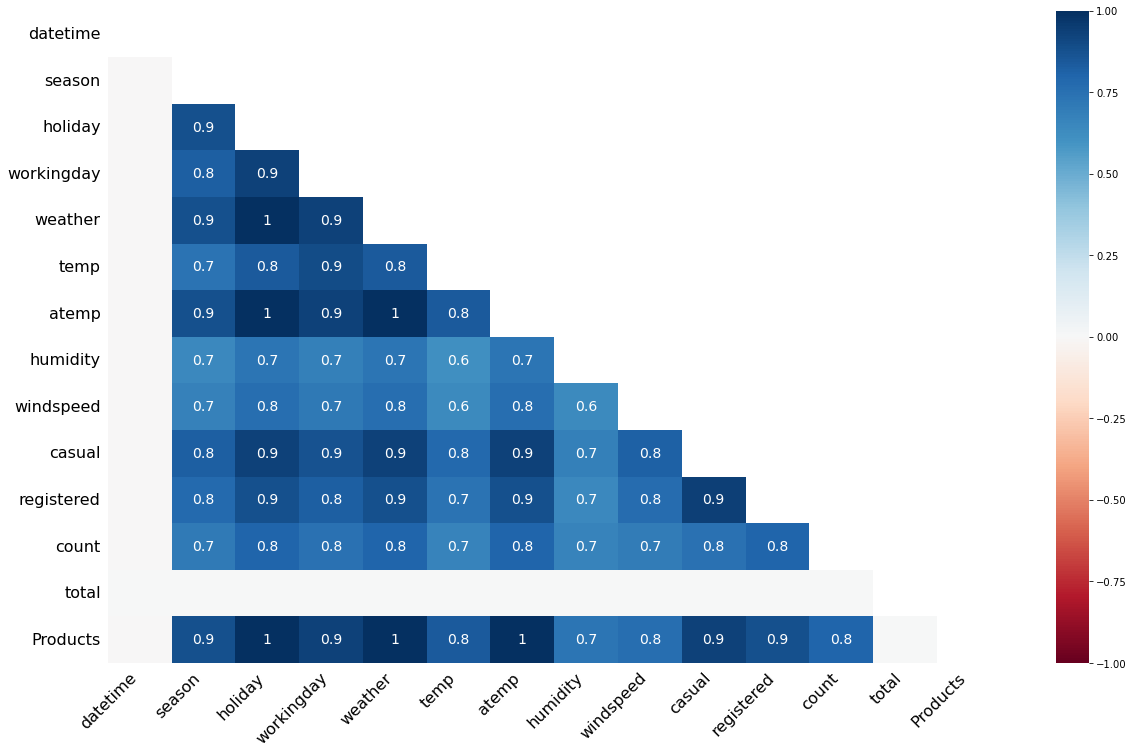

In [10]:
msno.heatmap(df)

>  It is used to see if there is a link between the columns when null values are present.

> Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

> There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

>Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

> Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.


>>>>> Since all the visulization of the data provided, it is clear the column of 'total' have almost 98% of the values missing so we will go ahead and delete/dropthe column.

In [11]:
df = df.drop("total", axis=1)

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,abc


In [13]:
df.dtypes


datetime       object
season        float64
holiday        object
workingday    float64
weather       float64
temp          float64
atemp         float64
humidity      float64
windspeed      object
casual        float64
registered    float64
count          object
Products       object
dtype: object

In [14]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
10881,12/19/2012 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10882,12/19/2012 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10883,12/19/2012 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10884,12/19/2012 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10885,12/19/2012 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> This shows that most of the ending rows have all the values as nan.

> As most attributes other than datetime are missing we can easily remove the data.

In [15]:
df = df.dropna(thresh=12)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,abc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,12/19/2012 12:00,4.0,0,1.0,1.0,16.40,20.455,54.0,19.0012,33.0,203.0,236,stu
10875,12/19/2012 13:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,30.0,183.0,213,stu
10876,12/19/2012 14:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,33.0,185.0,218,stu
10877,12/19/2012 15:00,4.0,0,1.0,1.0,17.22,21.210,50.0,19.0012,28.0,209.0,237,stu


In [16]:
df.isna().sum()

datetime      4
season        2
holiday       0
workingday    0
weather       0
temp          2
atemp         0
humidity      4
windspeed     2
casual        0
registered    0
count         1
Products      0
dtype: int64

>> As shown above the last values in the tail of the dataset where all the columns except datetime are nan we remove these rows by using thresh=n 

> here n stands for the number of columns that should have nan in a row , or simply number of times a row have NaN, meaning it will remove all such rows, having n numbers in this case 12 Nan value in a row.

> And as we can see the total number of null display shows a decrease in the numbers.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10873 entries, 0 to 10878
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10869 non-null  object 
 1   season      10871 non-null  float64
 2   holiday     10873 non-null  object 
 3   workingday  10873 non-null  float64
 4   weather     10873 non-null  float64
 5   temp        10871 non-null  float64
 6   atemp       10873 non-null  float64
 7   humidity    10869 non-null  float64
 8   windspeed   10871 non-null  object 
 9   casual      10873 non-null  float64
 10  registered  10873 non-null  float64
 11  count       10872 non-null  object 
 12  Products    10873 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.2+ MB


> Through our analysis above we known the columns missing the values and we will use techniques like interpolation, replacing by mode or median or other such techniques to fill the nan values in the data.

In [18]:
df['season'].value_counts()


3.0    2733
2.0    2731
4.0    2727
1.0    2680
Name: season, dtype: int64

In [19]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,abc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,12/19/2012 12:00,4.0,0,1.0,1.0,16.40,20.455,54.0,19.0012,33.0,203.0,236,stu
10875,12/19/2012 13:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,30.0,183.0,213,stu
10876,12/19/2012 14:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,33.0,185.0,218,stu
10877,12/19/2012 15:00,4.0,0,1.0,1.0,17.22,21.210,50.0,19.0012,28.0,209.0,237,stu


In [20]:
mode_col=df['season'].mode()[0]
##def replace_by_mode(df):
  ##  for column in df:
    ##    df[column].fillna(df[column].mode()[0], inplace=True)

In [21]:
print(mode_col)

3.0


In [22]:
df['season'] = df['season'].fillna(mode_col)

>> The season column have four type of values 1, 2, 3,and 4 we see the most recurssive value that is find the mode of the column as shown above the method can also be used for replacing the values but here since only one column needs the operation we will just write the command and replace the two empty position of season column with the mode.

In [23]:
df.isna().sum()

datetime      4
season        0
holiday       0
workingday    0
weather       0
temp          2
atemp         0
humidity      4
windspeed     2
casual        0
registered    0
count         1
Products      0
dtype: int64

In [24]:
df['count'] = df['count'].fillna(0)
df['windspeed'] = df['windspeed'].fillna(0)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,abc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,12/19/2012 12:00,4.0,0,1.0,1.0,16.40,20.455,54.0,19.0012,33.0,203.0,236,stu
10875,12/19/2012 13:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,30.0,183.0,213,stu
10876,12/19/2012 14:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,33.0,185.0,218,stu
10877,12/19/2012 15:00,4.0,0,1.0,1.0,17.22,21.210,50.0,19.0012,28.0,209.0,237,stu


In [25]:
df['humidity'].value_counts()
mode_col_h=df['humidity'].mode()[0]
print(mode_col_h)
df['humidity'] = df['humidity'].fillna(mode_col_h)

88.0


In [26]:
mode_col_t=df['temp'].mean()
print(mode_col_t)
df['temp'] = df['temp'].fillna(mode_col_t)

20.209605372090824


The null values in count, humidity and temp are dealth here:

> In count we just represent missing value by giving the value zero

> In humidity since we are taking it as an objject we will just keep the mode for the missing two values , since the numer of missing values is less it will not that greatly effect the result if a value repeating itself repeat two more time.

> For temperature we simply goes for mean, interpolation can also be used if we have higher number of missing values but at this point it won't have a drastic effect oon the polting of the curves.

In [27]:
df.isna().sum()

datetime      4
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
Products      0
dtype: int64

In [28]:
df['datetime'] = df['datetime'].fillna("No Date and time")

In [29]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
Products      0
dtype: int64

> Datetime, taken the advantage of the object value is given a new category of no date and time which shows the absence of time and date.

### Miss entry

In [30]:
df['holiday'] = df['holiday'].str.replace('hello','0')

In [31]:
print(df['holiday'].value_counts())

0    10562
1      311
Name: holiday, dtype: int64


Assuming that holiday column have a miss entry we will just replace the value from the column with the highest repeatetive value.

# Outliers

First we see how many numeric columns do we have.

In [32]:
def get_cols_type(df):
    types_of_col = df.dtypes.to_dict()
    numeric_cols = []
    category_cols = []
    for m,p in types_of_col.items():
        if np.issubdtype(np.int64, p) or np.issubdtype(np.float64, p):
            numeric_cols.append(m)
        if not( np.issubdtype(np.int64, p) or np.issubdtype(np.float64, p)):
            category_cols.append(m)

    return numeric_cols,category_cols

In [33]:
Numeric_columns_list, categorical_columns_list = get_cols_type(df)
print(Numeric_columns_list)
print(categorical_columns_list)

['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'casual', 'registered']
['datetime', 'holiday', 'windspeed', 'count', 'Products']


In the method above the numeric columns and categorical columns are separated and a list is formed which will be further used to plot and visualize the data.

In [34]:
# Box Plot
def box_plots(Numeric_columns_list, df):
    for i in range(len(Numeric_columns_list)-1):
        plt.figure(figsize=(9, 4), dpi = 100)
        sns.boxplot(x = df[Numeric_columns_list[i]])

# Distribution plots
def dis_plots(Numeric_columns_list, df): 
    for i in range(len(Numeric_columns_list)-1):
        plt.figure(figsize=(9, 4), dpi = 100)
        sns.displot(df[Numeric_columns_list[i]])

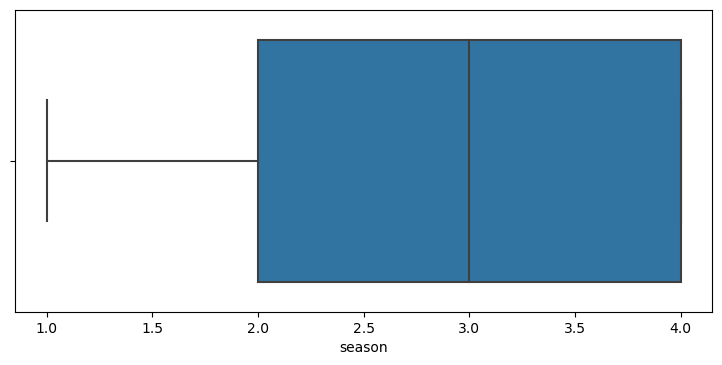

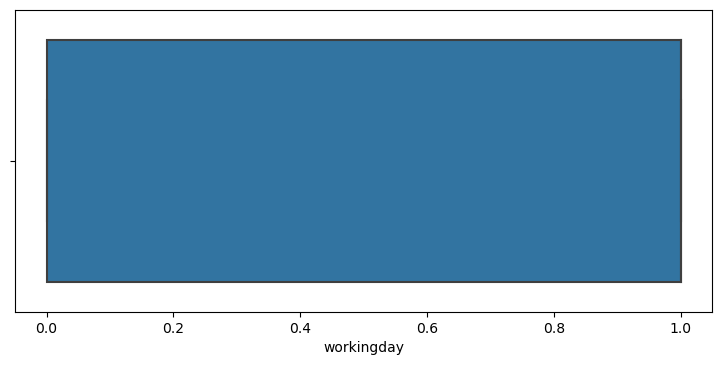

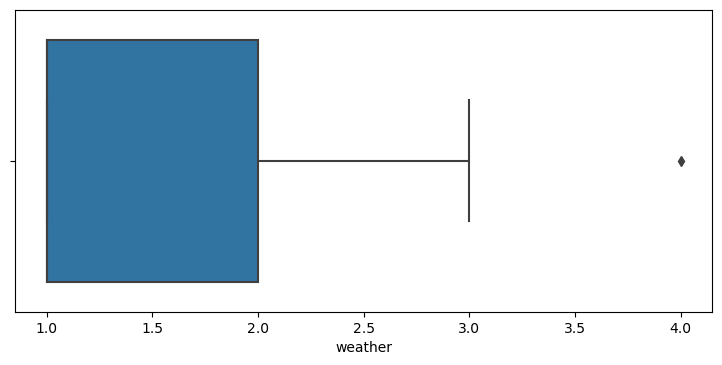

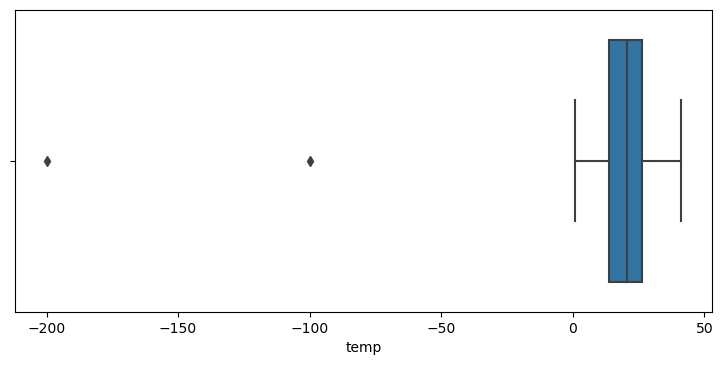

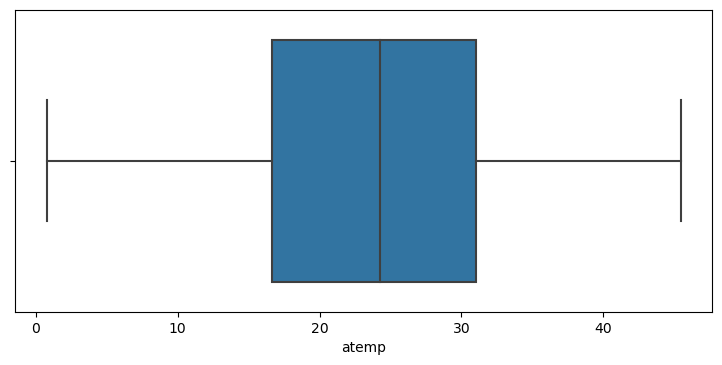

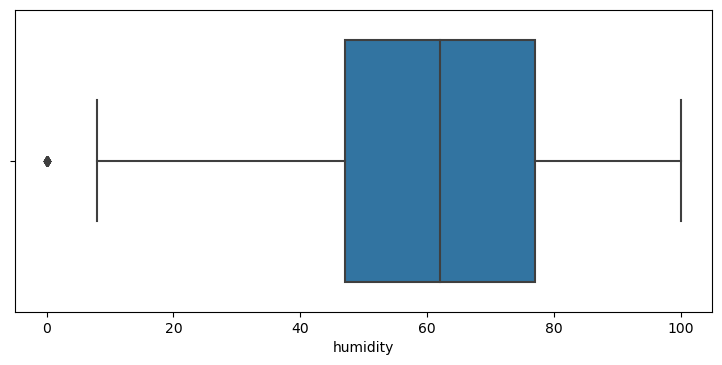

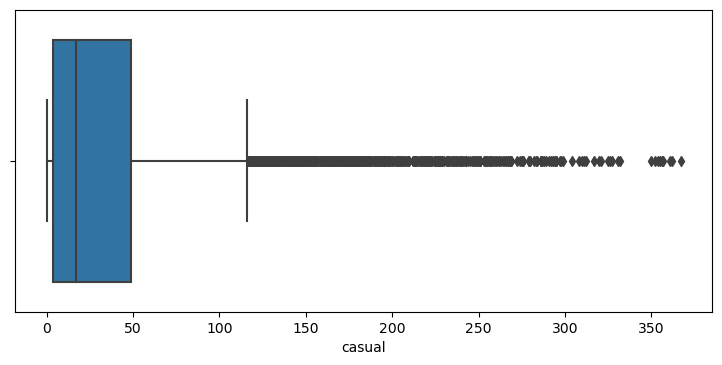

In [35]:
box_plots(Numeric_columns_list, df)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10873.0,2.506668,1.115636,1.00,2.000,3.00,4.00,4.000
workingday,10873.0,0.680677,0.466236,0.00,0.000,1.00,1.00,1.000
weather,10873.0,1.418744,0.633884,1.00,1.000,1.00,2.00,4.000
temp,10873.0,20.209605,8.152147,-200.00,13.940,20.50,26.24,41.000
atemp,10873.0,23.662952,8.473409,0.76,16.665,24.24,31.06,45.455
humidity,10873.0,61.908765,19.254381,0.00,47.000,62.00,77.00,100.000
casual,10873.0,36.050032,49.982039,0.00,4.000,17.00,49.00,367.000
registered,10873.0,155.514118,151.007619,0.00,36.000,118.00,222.00,886.000


The box plots are quite normal for season and working day.
>> The outliers are detacted in   ------------
>>      weather column at 4.0  ---------------------------
>>      temp col at -100 and -200 -----------------------
>>       humidity at 0       -----------------------
>>        casual after 200 but maximum outlier is at almost more that 350

<AxesSubplot:>

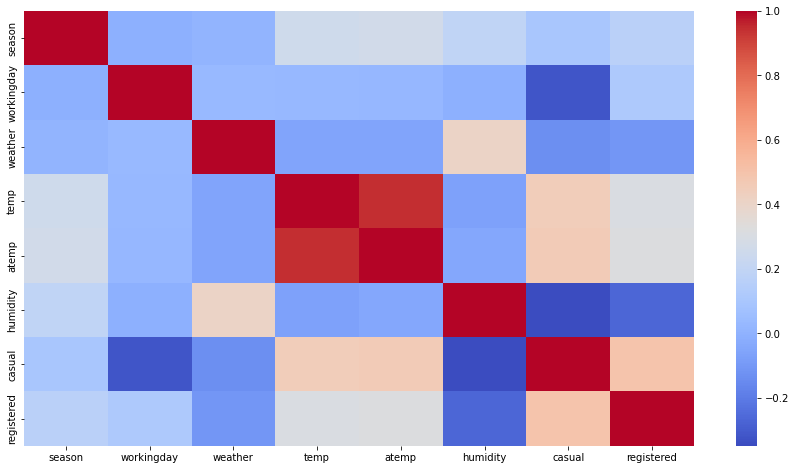

In [37]:
fig, ax = plt.subplots(figsize=(15,8))       
sns.heatmap(df.corr(), cmap= 'coolwarm')

>> The corelation between atemp and temp is quite strong

>>between casual and registered it also on the kiddle of the scale.

>>humidity and weather also have a corelation, not that strong but it still exist.



<Figure size 900x400 with 0 Axes>

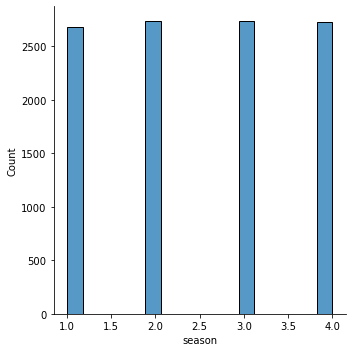

<Figure size 900x400 with 0 Axes>

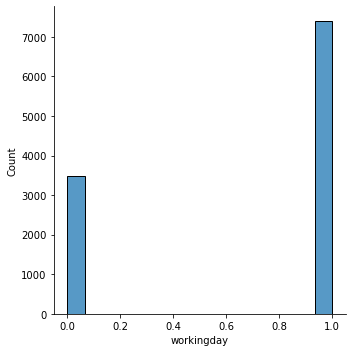

<Figure size 900x400 with 0 Axes>

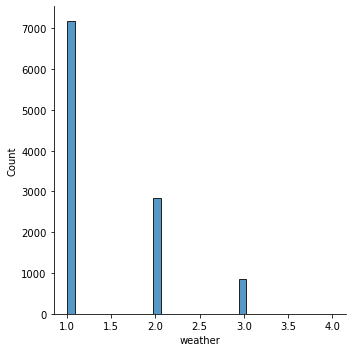

<Figure size 900x400 with 0 Axes>

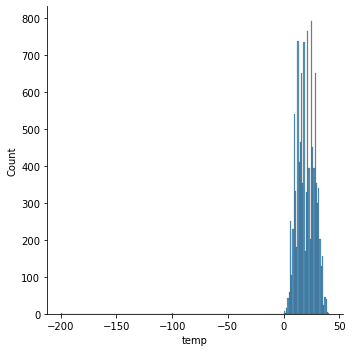

<Figure size 900x400 with 0 Axes>

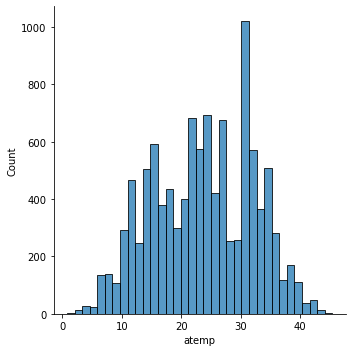

<Figure size 900x400 with 0 Axes>

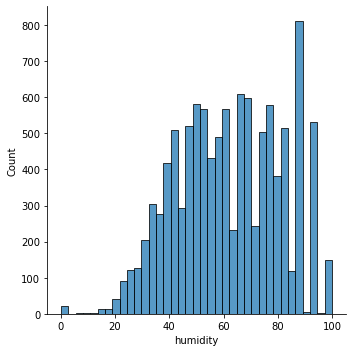

<Figure size 900x400 with 0 Axes>

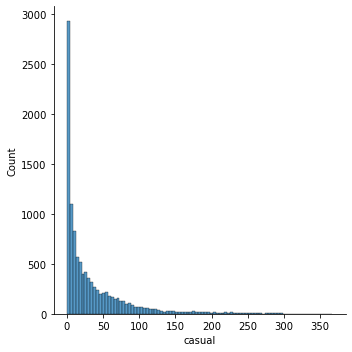

In [38]:
# distribution of column
dis_plots(Numeric_columns_list, df)


> The distribution graphs shows the patterns followed by different data as:

>>>count decrease drastically between zero and fifty.

>>>humidity increase mostly after 40.

>>> atemp forms a parabolic curve.

>>>temp have major values between 0 and 50

>>>season, weather and workingday show simple bar graphs.


# Analysis of categorical columns

In [39]:
# Value counts of categorical columns:
for col in categorical_columns_list:
    print(df[col].value_counts())
    print()

No Date and time    4
1/1/2011 0:00       1
5/1/2012 21:00      1
5/1/2012 13:00      1
5/1/2012 14:00      1
                   ..
9/2/2011 8:00       1
9/2/2011 9:00       1
9/2/2011 10:00      1
9/2/2011 11:00      1
12/19/2012 16:00    1
Name: datetime, Length: 10870, dtype: int64

0    10562
1      311
Name: holiday, dtype: int64

0          1312
8.9981     1118
11.0014    1057
12.998     1042
7.0015     1032
15.0013     958
6.0032      871
16.9979     823
19.0012     676
19.9995     492
22.0028     372
23.9994     272
26.0027     232
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      21
43.0006      12
40.9973      11
43.9989       8
46.0022       3
47.9988       2
56.9969       2
0             2
50.0021       1
51.9987       1
why not       1
Name: windspeed, dtype: int64

5      169
4      149
3      144
6      135
2      132
      ... 
825      1
830      1
660      1
819      1
636      1
Name: count, Length: 824, dtyp

So here we can analyzie the categorical data 
>dateand time have unique values except where the data is unavailable so we just take a string representing unavailability of data 

>holiday = it has two options of 0 and 1 and an outlier stating hello (already treated above)

>windspeed = windspeed does  not have alot of redundant values 

The other two categories also show different kind of trends.

# Inferential Analysis

### t-test

In [40]:
def t_test(df):
    num_columns,c = get_cols_type(df)
    for i in range(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')


In [41]:
t_test(df)


 --------season--------
(season,workingday) => t-value=157.46960211279355, p-value=0.0
Dependent (reject H0)
(season,weather) => t-value=88.40947162836846, p-value=0.0
Dependent (reject H0)
(season,temp) => t-value=-224.34625274403413, p-value=0.0
Dependent (reject H0)
(season,atemp) => t-value=-258.12131200010396, p-value=0.0
Dependent (reject H0)
(season,humidity) => t-value=-321.15826822701587, p-value=0.0
Dependent (reject H0)
(season,casual) => t-value=-69.96151104361162, p-value=0.0
Dependent (reject H0)
(season,registered) => t-value=-105.65171684966866, p-value=0.0
Dependent (reject H0)

 --------workingday--------
(workingday,weather) => t-value=-97.8048578018828, p-value=0.0
Dependent (reject H0)
(workingday,temp) => t-value=-249.38596087405438, p-value=0.0
Dependent (reject H0)
(workingday,atemp) => t-value=-282.39245591316035, p-value=0.0
Dependent (reject H0)
(workingday,humidity) => t-value=-331.4885585573864, p-value=0.0
Dependent (reject H0)
(workingday,casual) => t-va

This simply shows that relation exist .
If a p-value reported from a t test is less than 0.05, then that result is said to be statistically significant. If a p-value is greater than 0.05, then the result is insignificant.

>> so many columns have a significant result here.

>>> For annova it simply means to show that relation exist between and string and numeric value

>>> Tukey confirms the relation exit betwween two particular groups.

### Chi Square

In [42]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

### Anova

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

### Tukey

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()

In [47]:
##from pandas_profiling import ProfileReport
##prof = ProfileReport(df)
##prof.to_file(output_file='output.html')